In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autos_data = pd.read_csv('data/autos.csv')
autos_data.head(2)


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500


In [3]:
X = autos_data.copy()
y = X.pop('price')

#encoding categorical data
for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()

discrete_features = X.dtypes == int

In [4]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    discrete_columns = X.columns[discrete_features]
    mi_scores = mutual_info_regression(X[discrete_columns], y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=discrete_columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] 

curb_weight     0.833494
engine_size     0.537779
drive_wheels    0.327896
aspiration      0.087994
symboling       0.056247
make            0.033336
Name: MI Scores, dtype: float64

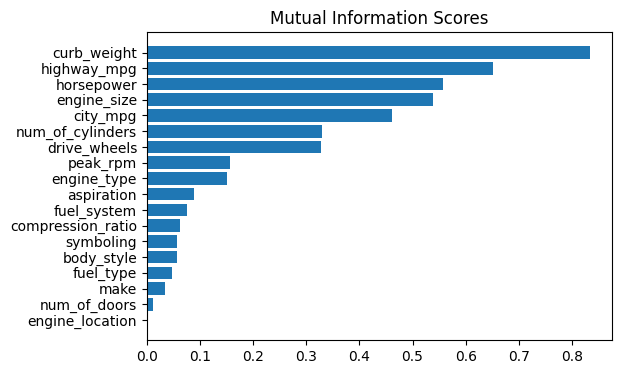

In [5]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Scores')

plt.figure(dpi=100, figsize=(6,4))
plot_mi_scores(mi_scores)

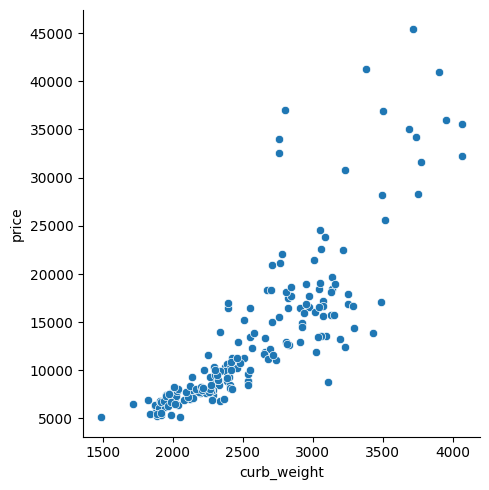

In [6]:
sns.relplot(x='curb_weight', y='price', data=autos_data)

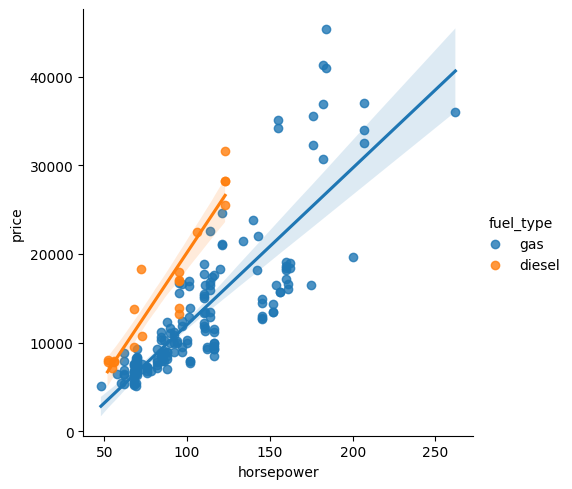

In [7]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=autos_data)

**Exercises**

In [8]:
#dataset ames will be used for this exercise
ames_data = pd.read_csv('data/ames.csv')
ames_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000


In [9]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2930 non-null   object 
 1   MSZoning          2930 non-null   object 
 2   LotFrontage       2930 non-null   float64
 3   LotArea           2930 non-null   float64
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   LotShape          2930 non-null   object 
 7   LandContour       2930 non-null   object 
 8   Utilities         2930 non-null   object 
 9   LotConfig         2930 non-null   object 
 10  LandSlope         2930 non-null   object 
 11  Neighborhood      2930 non-null   object 
 12  Condition1        2930 non-null   object 
 13  Condition2        2930 non-null   object 
 14  BldgType          2930 non-null   object 
 15  HouseStyle        2930 non-null   object 
 16  OverallQual       2930 non-null   object 


In [10]:
def make_mi_scores(X,y):
    X = X.copy()
    for x in X.select_dtypes(['object', 'category']):
        X[x], _ = X[x].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [11]:
#utility function from tutorial
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    

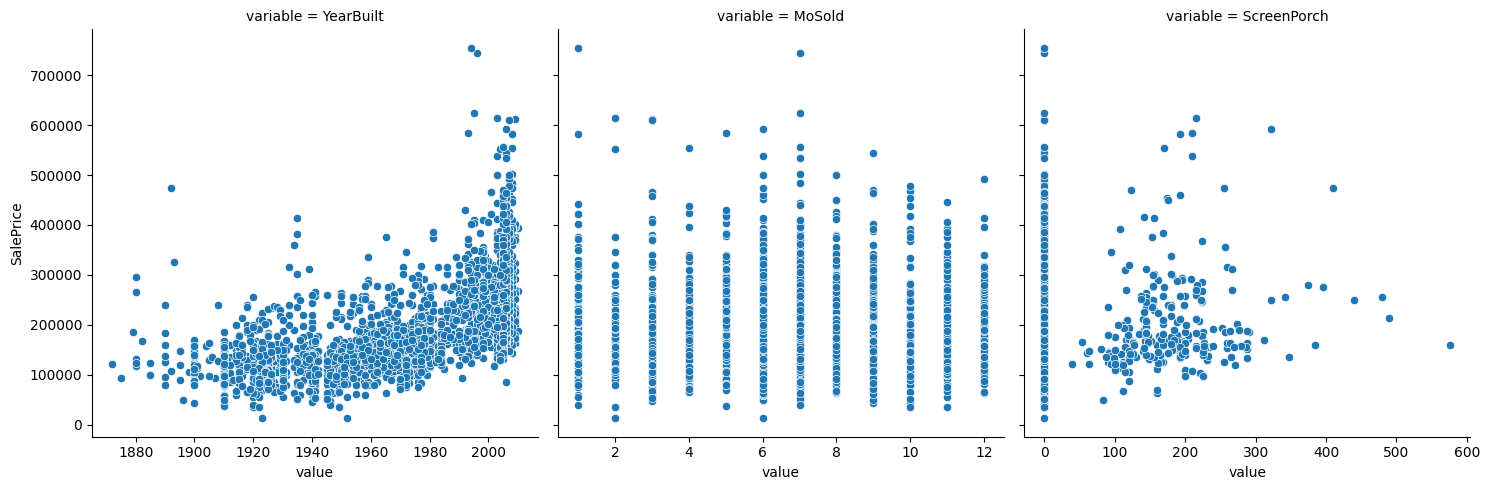

In [12]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=ames_data.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [13]:
X = ames_data.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X,y)

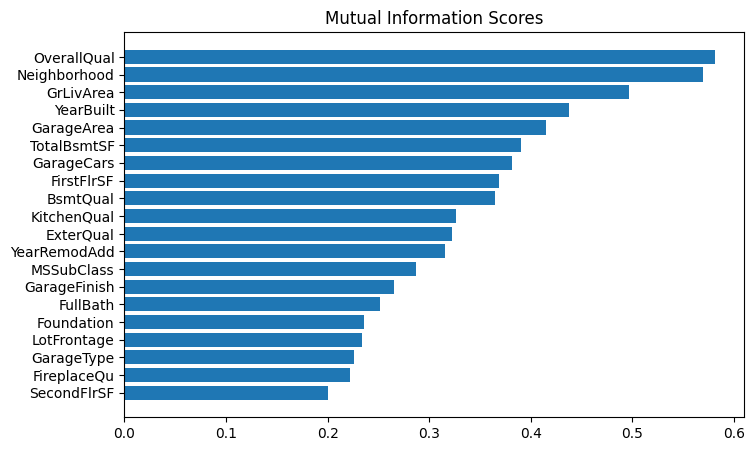

In [14]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

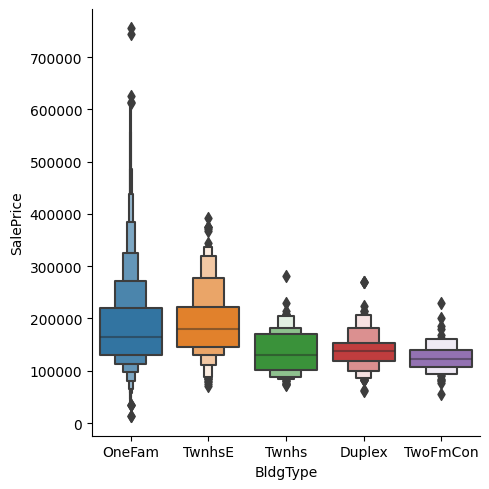

In [15]:
sns.catplot(x='BldgType', y='SalePrice', data=ames_data, kind='boxen')

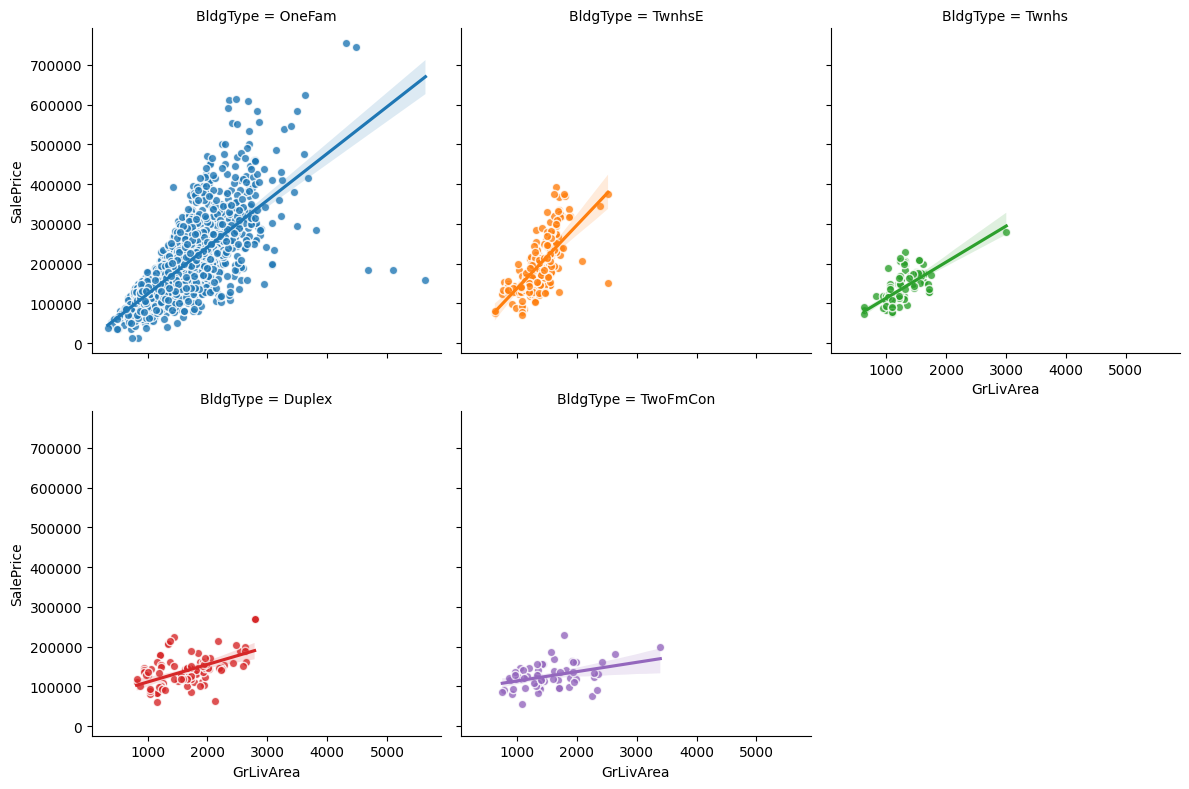

In [16]:
feature = 'GrLivArea'

sns.lmplot(x=feature, y='SalePrice', hue='BldgType', col='BldgType',
                data=ames_data, scatter_kws={'edgecolor': 'w'}, col_wrap=3, height=4)

**Creating Features**

*Tips on Discovering New Features*
- Understand the features. Refer to your dataset's data documentation, if available.
- Research the problem domain to acquire domain knowledge. If your problem is predicting house prices, do some research on real-estate for instance. Wikipedia can be a good starting point, but books and journal articles will often have the best information.
- Study previous work. Solution write-ups from past Kaggle competitions are a great resource.
- Use data visualization. Visualization can reveal pathologies in the distribution of a feature or complicated relationships that could be simplified. Be sure to visualize your dataset as you work through the feature engineering process.

In [17]:
#Read data from csv
accidents_data = pd.read_csv('data/accidents.csv')
autos_data = pd.read_csv('data/autos.csv')
concrete_data = pd.read_csv('data/concrete.csv')
customer_data = pd.read_csv('data/customer.csv')

In [18]:
autos_data['stroke_rasio'] = autos_data.stroke / autos_data.bore

autos_data[['stroke', 'bore', 'stroke_rasio']].head()

,stroke,bore,stroke_rasio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [19]:
autos_data['displacment'] = (
    np.pi * ((0.5 * autos_data.bore) ** 2) * autos_data.stroke * autos_data.num_of_cylinders
)

<AxesSubplot: xlabel='LogWindSpeed', ylabel='Density'>

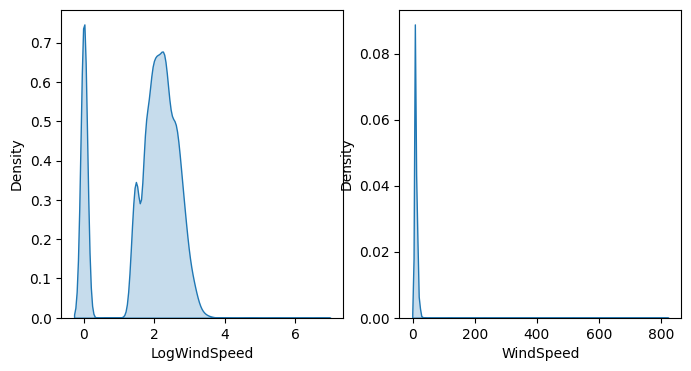

In [20]:
#if the features has 0.0 values, use np.log1p (log(1+x)) instead np.log 
accidents_data['LogWindSpeed'] = accidents_data.WindSpeed.apply(np.log1p)

#plot a comparison
fig, axs = plt.subplots(1,2, figsize=(8,4))

sns.kdeplot(accidents_data.WindSpeed, fill=True, ax=axs[1])
sns.kdeplot(accidents_data.LogWindSpeed, fill=True, ax=axs[0])

*Counts*

In [21]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

accidents_data['RoadwayFeatures'] = accidents_data[roadway_features].sum(axis='columns')

accidents_data[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [22]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

concrete_data['Components'] = concrete_data[components].gt(0).sum(axis=1)

concrete_data[components + ['Components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


*Building-Up and Breaking-Down Features*

In [23]:
#create 2 new features > from policy features > through string accessor > by spliting on ' ' and expanding the result into separate columns
customer_data[['Type', 'Level']] = (customer_data['Policy'].str.split(' ',expand=True))

customer_data[['Policy','Type', 'Level']].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [24]:
#or join simpe feature into a composed feature if there are a reason
autos_data['make_nad_style'] = autos_data['make'] + '_' + autos_data['body_style']

autos_data[['make', 'body_style', 'make_nad_style']].head()

,make,body_style,make_nad_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


**Elsewhere on Kaggle Learn**
There are a few other kinds of data we haven't talked about here that are especially rich in information. Fortunately, we've got you covered!
- For dates and times, see Parsing Dates from our Data Cleaning course.
- For latitudes and longitudes, see our Geospatial Analysis course.

**Group Transforms**

In [25]:
customer_data['AvarageIncome'] = (customer_data.groupby('State')['Income'].transform('mean'))

customer_data[['State','Income','AvarageIncome']].head(10)

,State,Income,AvarageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [26]:
customer_data['StateFreq'] = (customer_data.groupby('State')['State'].transform('count') / customer_data.State.count())

customer_data[['State', 'StateFreq']].head()

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366


You could use a transform like this to create a "frequency encoding" for a categorical feature.

If you're using training and validation splits, to preserve their independence, it's best to create a grouped feature using only the training set and then join it to the validation set. We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

In [27]:
#Create Split
df_train = customer_data.sample(frac=0.5)
df_valid = customer_data.drop(df_train.index)

#create the avarage claim amount by coverage type on the training

df_train['AvarageClaim'] = df_train.groupby('Coverage')['ClaimAmount'].transform('mean')

#Merge the values into validation set

df_valid = df_valid.merge(df_train[['Coverage','AvarageClaim']].drop_duplicates(), on='Coverage', how='left')

df_valid[['Coverage', 'AvarageClaim']].head(10)

,Coverage,AvarageClaim
0,Extended,481.603491
1,Basic,377.762486
2,Basic,377.762486
3,Basic,377.762486
4,Premium,644.184991
5,Basic,377.762486
6,Basic,377.762486
7,Premium,644.184991
8,Basic,377.762486
9,Basic,377.762486


**Tips on Creating Features**
It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:
- Linear models learn sums and differences naturally, but can't learn anything more complex.
- Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
- Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
- Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
- Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.

**Exercises**

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


# Prepare data
X = ames_data.copy()
y = X.pop("SalePrice")

In [29]:
#1) Create Math Transform

X_1 = pd.DataFrame() # dataframe to hold new features

X_1['LivLotRatio'] = X.GrLivArea / X.LotArea
X_1['Spaciousness'] = (X.FirstFlrSF + X.SecondFlrSF) / X.TotRmsAbvGrd
X_1['TotalOutsideSF'] = X.WoodDeckSF + X.OpenPorchSF + X.EnclosedPorch + X.Threeseasonporch + X.ScreenPorch

In [30]:
# 2) Interaction with a categorical
X_2 = pd.get_dummies(ames_data.BldgType, prefix='Bldg')

#multiply row by row
X_2 = X_2.mul(ames_data.GrLivArea, axis='rows')

In [31]:
# 3) Count features
X_3 = pd.DataFrame()

porche_types = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','Threeseasonporch','ScreenPorch']

X_3['PorchTypes'] = X[porche_types].gt(0.0).sum(axis=1) #gt stand for greater than
X_3.head(4)

,PorchTypes
0,2
1,2
2,2
3,0


In [32]:
#4) Break down a Categorical Feature
ames_data.MSSubClass.unique()

X_4 = pd.DataFrame()

X_4['MSClass'] = X.MSSubClass.str.split('_', n=1,expand=True)[0]

In [33]:
#5) Use a Grouped Transform

X_5 = pd.DataFrame()

X_5['MedNhbdArea'] = X.groupby('Neighborhood')['GrLivArea'].transform('median')
X_5['MedNhbdArea'].head()


0    1200.0
1    1200.0
2    1200.0
3    1200.0
4    1560.0
Name: MedNhbdArea, dtype: float64

In [34]:
X_new = X.join([X_1, X_2, X_3, X_4, X_5])
score_dataset(X_new, y)

0.13865658289209742

_Exercise finished!!_

**Clustering With K-Means**

In [35]:
# using california housing dataset
housing_data = pd.read_csv('data/housing.csv')
housing_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
X = housing_data.loc[:,["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values.

In [37]:
from sklearn.cluster import KMeans
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')
X.head() 

/home/yogasugitha/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,0


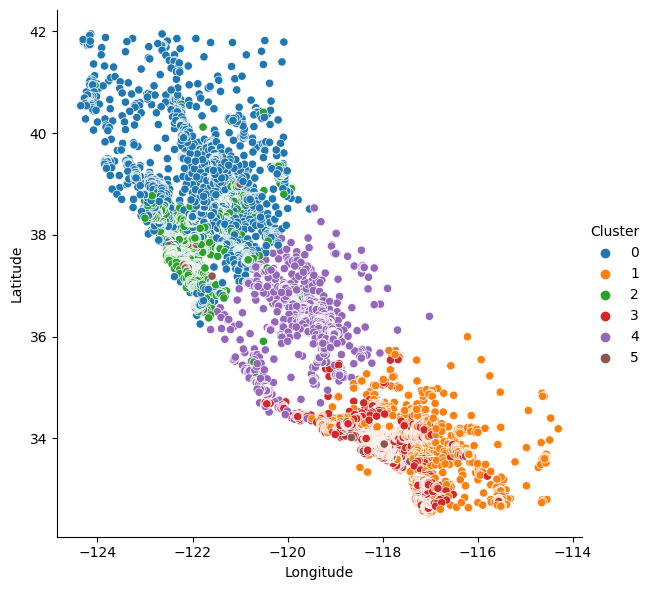

In [38]:
#plotting to see how effective this model
sns.relplot(x='Longitude', y='Latitude', hue='Cluster', data=X, height=6)

target in this dataset is _MedHouseVal_ (median house value)

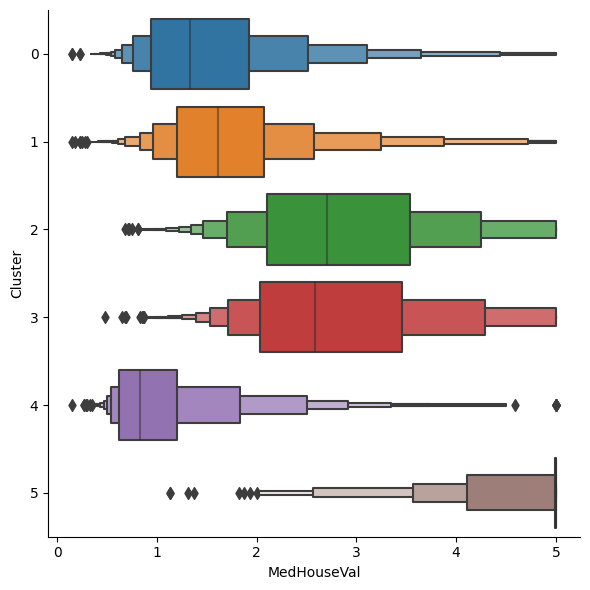

In [39]:
X['MedHouseVal'] = housing_data['MedHouseVal']
sns.catplot(x=('MedHouseVal'), y=('Cluster'), data=X, kind='boxen', height=6)

**Exercise**

In [40]:
def score_dataset(X,y,model=XGBRegressor()):
    #label encoding for categorical
    for col in X.select_dtypes(['category','object']):
        X[col], _ = X[col].factorize()
    score = cross_val_score(
        model, X,y,cv=5,scoring='neg_mean_squared_log_error'
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

df_ames = ames_data.copy()

In [41]:
X = df_ames.copy()
y = X.pop('SalePrice')

feature = ['LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF','GrLivArea']

#Standardize
X_scaled = X.loc[:, feature]
X_scaled = (X_scaled - X_scaled.mean(axis='rows')) / X_scaled.std(axis='rows')

#Fit the Kmeans model to X_scaled and create cluster labels
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
X['Cluster'] = kmeans.fit_predict(X_scaled)

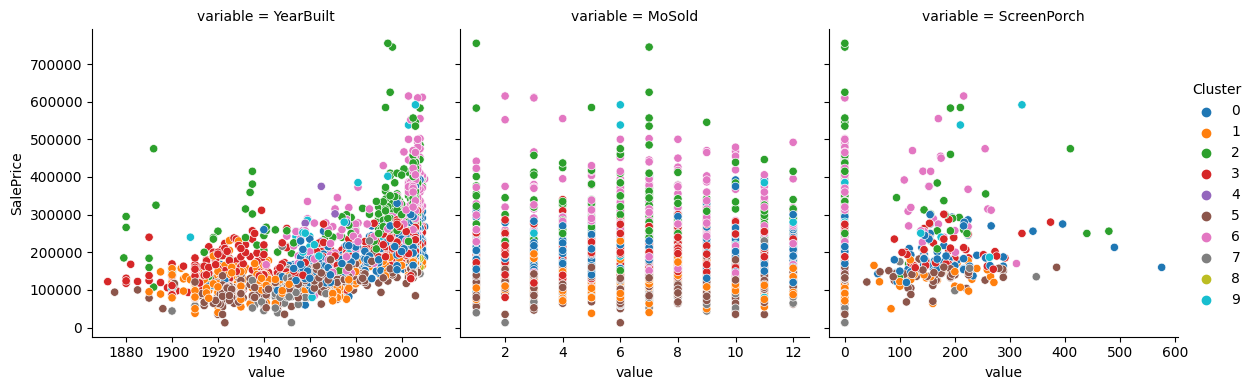

In [42]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);

In [43]:
score_dataset(X,y)

0.14046321426092023

In [44]:
# 3) Cluster-Distance Features
kmeans = KMeans(n_clusters=10, n_init=10,random_state=0)
#create the cluster-distance features using 'fit_transform'
X_cd = kmeans.fit_transform(X_scaled)

#Lavel features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f'Centroid_{i}' for i in range(X_cd.shape[1])])
X = X.join(X_cd)


In [45]:
#score dataset
score_dataset(X,y)

0.14143337222253943

_Exercise done!!_

**Principal Component Analysis**

(Technical note: PCA is typically applied to standardized data. With standardized data "variation" means "correlation". With unstandardized data "variation" means "covariance". All data in this course will be standardized before applying PCA.)

PCA Best Practices
There are a few things to keep in mind when applying PCA:
- PCA only works with numeric features, like continuous quantities or counts.
- PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
- Consider removing or constraining outliers, since they can have an undue influence on the results.

In [53]:
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
    
def make_mi_scores(X,y,discrete_features):
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='Mi Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

df_autos = autos_data.copy()


In [54]:
df_autos.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'stroke_rasio', 'displacment', 'make_nad_style'],
      dtype='object')

In [55]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df_autos.copy()
y = X.pop('price')
X = X.loc[:,features]

#Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [56]:
from sklearn.decomposition import PCA

#Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#covert to dataframe to store the value
component_name = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_name)
X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


After fitting, the PCA instance contains the loadings in its components_ attribute. (Terminology for PCA is inconsistent, unfortunately. We're following the convention that calls the transformed columns in X_pca the components, which otherwise don't have a name.) We'll wrap the loadings up in a dataframe.

In [57]:
loadings = pd.DataFrame(
    pca.components_.T, # transpose the matric of loadings
    columns=component_name, # so the column are the principal components
    index=X.columns, # and the rows are the original features
)

loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


array([<AxesSubplot: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

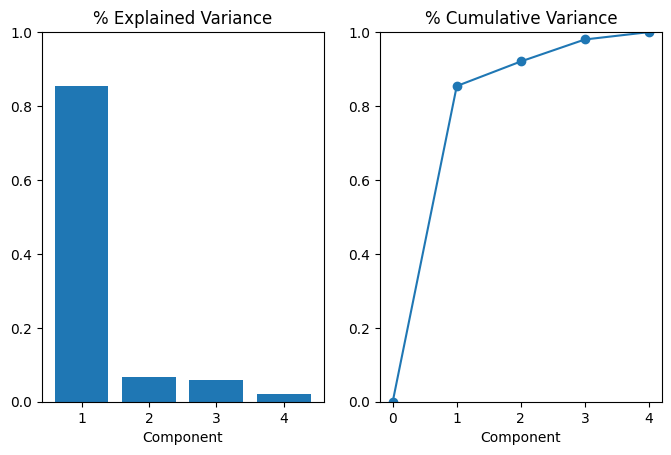

In [58]:
plot_variance(pca)

In [59]:
mi_scores = make_mi_scores(X_pca,y,discrete_features=False)
mi_scores

PC1    1.013512
PC2    0.379665
PC3    0.307344
PC4    0.204155
Name: Mi Scores, dtype: float64

In [60]:
#Show dataframe sorted by PC3
idx = X_pca['PC3'].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df_autos.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


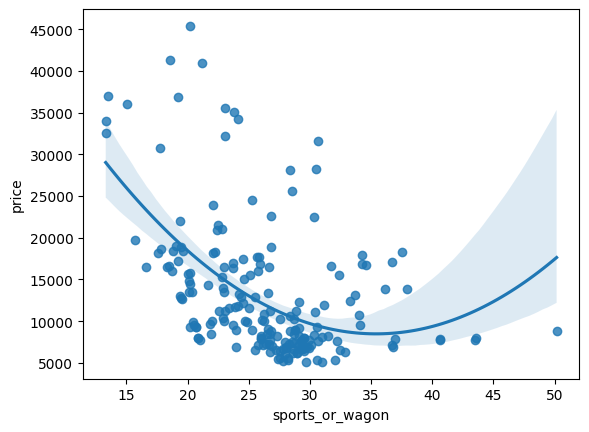

In [61]:
df_autos["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df_autos, order=2);

_Exercises_

In [62]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

#the dataset that will be used is ames dataset

In [63]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]
print('Correlation with SalePrice:\n')
print(df_ames[features].corrwith(df_ames.SalePrice))

Correlation with SalePrice:

GarageArea      0.640138
YearRemodAdd    0.532974
TotalBsmtSF     0.632529
GrLivArea       0.706780
dtype: float64


In [64]:
X = df_ames.copy()
y = X.pop('SalePrice')
X = X.loc[:, features]

#apply pca, defined above, reproduce the code from tutorial
pca, X_pca, loadings = apply_pca(X)
print(loadings)

                   PC1       PC2       PC3       PC4
GarageArea    0.541229  0.102375 -0.038470  0.833733
YearRemodAdd  0.427077 -0.886612 -0.049062 -0.170639
TotalBsmtSF   0.510076  0.360778 -0.666836 -0.406192
GrLivArea     0.514294  0.270700  0.742592 -0.332837


In [65]:
# Solution 1: Inspired by loadings
X = df_ames.copy()
y = X.pop("SalePrice")

X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF

score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")


# # Solution 2: Uses components
# X = df.copy()
# y = X.pop("SalePrice")

# X = X.join(X_pca)
# score = score_dataset(X, y)
# print(f"Your score: {score:.5f} RMSLE")

Your score: 0.13361 RMSLE


/home/yogasugitha/.local/lib/python3.9/site-packages/seaborn/categorical.py:3200: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


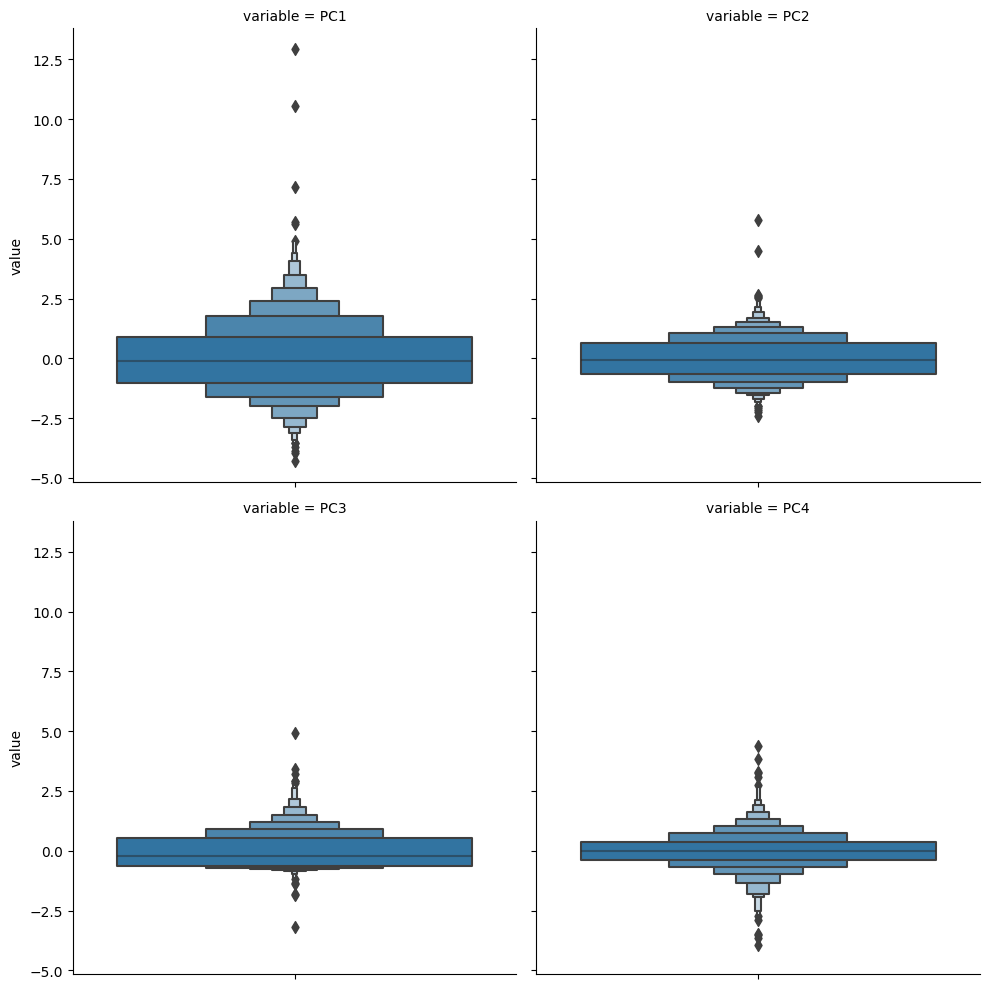

In [67]:
sns.catplot(
    y='value',
    col='variable',
    data=X_pca.melt(),
    kind='boxen',
    sharex=False,
    col_wrap=2,
)

In [68]:
component = "PC1"

idx = X_pca[component].sort_values(ascending=False).index
df_ames.loc[idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

,SalePrice,Neighborhood,SaleCondition,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
1498,160000,Edwards,Partial,1418.0,2008,6110.0,5642.0
2180,183850,Edwards,Partial,1154.0,2009,5095.0,5095.0
2181,184750,Edwards,Partial,884.0,2008,3138.0,4676.0
1760,745000,Northridge,Abnorml,813.0,1996,2396.0,4476.0
1767,755000,Northridge,Normal,832.0,1995,2444.0,4316.0
...,...,...,...,...,...,...,...
662,59000,Old_Town,Normal,0.0,1950,416.0,599.0
2679,80500,Brookside,Normal,0.0,1950,0.0,912.0
2879,51689,Iowa_DOT_and_Rail_Road,Abnorml,0.0,1950,0.0,729.0
780,63900,Sawyer,Normal,0.0,1950,0.0,660.0


_exercise finished_

**Target Encoding**

In [69]:
df_te = df_autos.copy()

In [70]:
#target encoding
df_te['make_encoded'] = df_te.groupby('make')['price'].transform('mean')
df_te[['make','price','make_encoded']].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


**smoothing**
A solution to these problems is to add smoothing. The idea is to blend the in-category average with the overall average. Rare categories get less weight on their category average, while missing categories just get the overall average.

**Use Cases for Target Encoding**
Target encoding is great for:
- **High-cardinality features**: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.
- **Domain-motivated features**: From prior experience, you might suspect that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness.

In [71]:
df_movielens = pd.read_csv('data/movielens1m.csv')
df_movielens = df_movielens.astype(np.uint8, errors='ignore') #reduce memory footprint
print('number of unique zipcodes: {}'.format(df_movielens['Zipcode'].nunique()))

number of unique zipcodes: 3439


In [72]:
X = df_movielens.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [74]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

/tmp/ipykernel_1005/1844280021.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, kde=False, norm_hist=True)


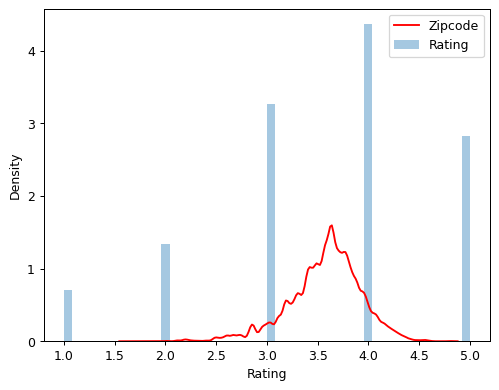

In [78]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);

_Exercise_

In [79]:
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

ames = pd.read_csv('data/ames.csv')

In [80]:
ames.select_dtypes(['object']).nunique()

MSSubClass       16
MSZoning          7
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         3
LotConfig         5
LandSlope         3
Neighborhood     28
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
RoofMatl          8
Exterior1st      16
Exterior2nd      17
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          6
BsmtCond          6
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       5
Functional        8
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            5
Fence             5
MiscFeature       6
SaleType         10
SaleCondition     6
dtype: int64

In [81]:
ames['SaleType'].value_counts()

WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: SaleType, dtype: int64

In [86]:
# 1) Choose Features for encoding
##encoding split
X_encode = ames.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop('SalePrice')

##training split
X_pretrain = ames.drop(X_encode.index)
y_train = X_pretrain.pop('SalePrice')

In [87]:
# 2) Apply M-Estimate Encoding
encoder = MEstimateEncoder(cols=['SaleType'], m=5.0)

encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain, y_train)

/tmp/ipykernel_1005/2128611064.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train, kde=True, hist=False)
/tmp/ipykernel_1005/2128611064.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)


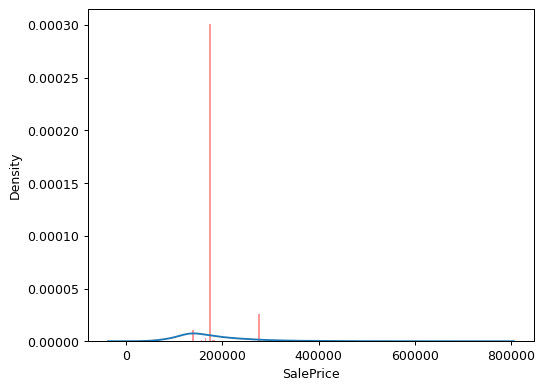

In [88]:
feature = encoder.cols

plt.figure(dpi=90)
ax = sns.distplot(y_train, kde=True, hist=False)
ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("SalePrice");

In [89]:
X = ames.copy()
y = X.pop("SalePrice")
score_base = score_dataset(X, y)
score_new = score_dataset(X_train, y_train)

print(f"Baseline Score: {score_base:.4f} RMSLE")
print(f"Score with Encoding: {score_new:.4f} RMSLE")

Baseline Score: 0.1428 RMSLE
Score with Encoding: 0.1454 RMSLE


In [90]:
# Try experimenting with the smoothing parameter m
# Try 0, 1, 5, 50
m = 0

X = ames.copy()
y = X.pop('SalePrice')

# Create an uninformative feature
X["Count"] = range(len(X))
X["Count"][1] = 0  # actually need one duplicate value to circumvent error-checking in MEstimateEncoder

# fit and transform on the same dataset
encoder = MEstimateEncoder(cols="Count", m=m)
X = encoder.fit_transform(X, y)

# Results
score =  score_dataset(X, y)
print(f"Score: {score:.4f} RMSLE")

/tmp/ipykernel_1005/3415012088.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Count"][1] = 0  # actually need one duplicate value to circumvent error-checking in MEstimateEncoder


Score: 0.0290 RMSLE


/tmp/ipykernel_1005/711682659.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, kde=True, hist=False)
/tmp/ipykernel_1005/711682659.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X["Count"], color='r', ax=ax, hist=True, kde=False, norm_hist=True)


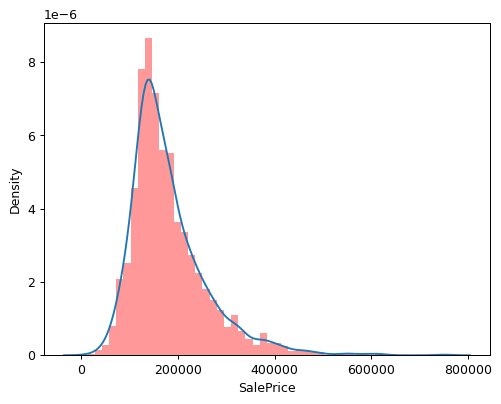

In [91]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=True, hist=False)
ax = sns.distplot(X["Count"], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("SalePrice");

_End of journey for parth feature engineering, hope it will give me something useful for future_